https://medium.com/@s.illesinghe/python-pandas-fundamentals-which-graphing-approach-is-better-fb5d21ac9635

In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from IPython.display import Image

C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\biegertm\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
text = """farm_name|month|monthly_beef_production|index
peony|01-2023|1.5|A0001
peony|02-2023|3.6|A0002
peony|03-2023|9.2|A0003
peony|04-2023|8.1|A0004
peony|05-2023|4.6|A0005
peony|06-2023|7.8|A0006
peony|07-2023|2.5|A0007
peony|08-2023|5.7|A0008
peony|09-2023|7.8|A0009
peony|10-2023|2.5|A0010
peony|11-2023|4.8|A0011
peony|12-2023|12.2|A0012
edelweiss|01-2023|3.5|A0013
edelweiss|02-2023|6.8|A0015
edelweiss|03-2023|7.9|A0016
edelweiss|04-2023|10.1|A0017
edelweiss|05-2023|9.7|A0018
edelweiss|06-2023|9.0|A0019
edelweiss|07-2023|8.5|A0020
edelweiss|08-2023|8.0|A0021
edelweiss|09-2023|8.3|A0022
edelweiss|10-2023|8.1|A0023
edelweiss|11-2023|7.8|A0024
edelweiss|12-2023|14.2|A0025
"""

s = io.StringIO(text)
with open('farm_monthly_production.psv', 'w') as f:
    for line in s:
        f.write(line)

In [3]:
farm_long=pd.read_csv('farm_monthly_production.psv',sep='|',index_col='index')
farm_long.head()

,farm_name,month,monthly_beef_production
index,,,
A0001,peony,01-2023,1.5
A0002,peony,02-2023,3.6
A0003,peony,03-2023,9.2
A0004,peony,04-2023,8.1
A0005,peony,05-2023,4.6


In [9]:
farm_wide =pd.pivot(farm_long, \
                    index='month',\
                    columns = 'farm_name',\
                    values = 'monthly_beef_production').reset_index()
farm_wide
print(farm_wide['month'])

0     01-2023
1     02-2023
2     03-2023
3     04-2023
4     05-2023
5     06-2023
6     07-2023
7     08-2023
8     09-2023
9     10-2023
10    11-2023
11    12-2023
Name: month, dtype: object


In [5]:
os.makedirs('graphs', exist_ok = True)

InvalidIndexError: (slice(None, None, None), 'month')

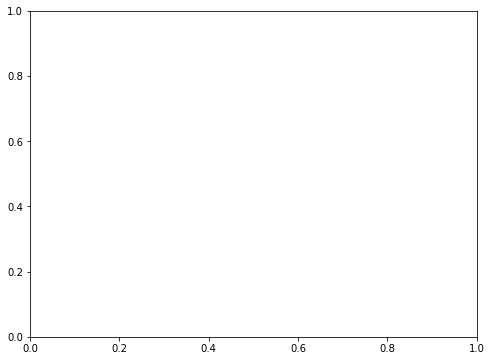

In [11]:
plt.close('all')
fig1 = plt.figure(figsize=(8,6), num=1)
ax1 = fig1.add_subplot(111)
#########################################
######Axes.plot section of the code######
#########################################
ax1.plot(farm_wide[:,'month'],farm_wide[:,'peony'],label='peony', color ='red')
ax1.plot(farm_wide[:,'month'],farm_wide[:,'edelweiss'],label='edelweiss',color ='black')
#########################################
ax1.set_xlabel('month')
ax1.set_ylabel('Beef production (t)')
ax1.set_xticks(list(farm_wide[:,'month'].values))
ax1.set_xticklabels(list(farm_wide[:,'month'].values), rotation=45, ha='right')
ax1.set_ylim((0,16))
ax1.grid(True)
ax1.legend(loc="upper left")
fig1.savefig('graphs/matplot_lib_1.png')

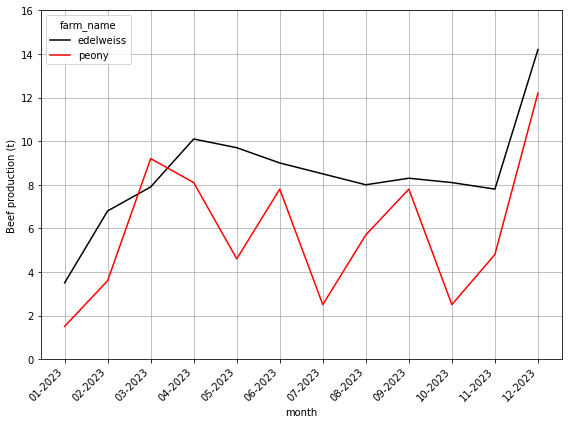

In [12]:
plt.close('all')
fig2 = plt.figure(figsize=(8,6), num=2)
ax2 = fig2.add_subplot(111)
##########################################
###DataFrame.plot() section of the code###
##########################################
farm_wide.plot(x='month',\
               y=['edelweiss','peony'],\
               ax=ax2,\
               color =['black','red'])
##########################################
ax2.set_xlabel('month')
ax2.set_ylabel('Beef production (t)')
ax2.set_xticks(farm_wide.index)
ax2.set_xticklabels(list(farm_wide['month'].values), \
                    rotation=45, ha='right')
ax2.set_ylim((0,16))
ax2.grid(True)
fig2.tight_layout()
fig2.savefig('graphs/df_plot.png')

C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\Anaconda3-1\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

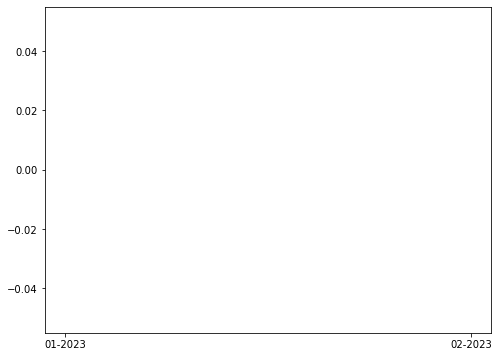

In [13]:
plt.close('all')
fig3 = plt.figure(figsize=(8,6), num=1)
ax3 = fig3.add_subplot(111)
##########################################
######Seaborn section of the code#########
##########################################
sns.lineplot(ax = ax3,\
             data=farm_long,\
             x="month",\
             y="monthly_beef_production",\
             hue="farm_name",\
             palette = ['red','black'])
##########################################
ax3.set_xlabel('month')
ax3.set_ylabel('Beef production (t)')
ax3.set_xticks(farm_wide.index)
ax3.set_xticklabels(list(farm_wide['month'].values), \
                    rotation=45, ha='right')
ax3.set_ylim((0,16))
ax3.grid(True)
fig3.tight_layout()
fig3.savefig('graphs/seaborn_plot.png')